In [3]:
#importing the dependencies.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
!pip install xgboost

You should consider upgrading via the 'C:\Users\USER\ML projects\Titanic challenge\myenv\Scripts\python.exe -m pip install --upgrade pip' command.


In [4]:
#load the train dataset.
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
print(train_df.shape, test_df.shape)

(891, 12) (418, 11)


In [5]:
#random 5 rows.
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S


In [6]:
#print(train_df.iloc[: , 4])

In [7]:
#datatype of each column.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking for the missing values in a column.
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#statistical information of the columns.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#checking for the duplicate rows.
train_df.duplicated().sum()

0

### Data visulisation

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


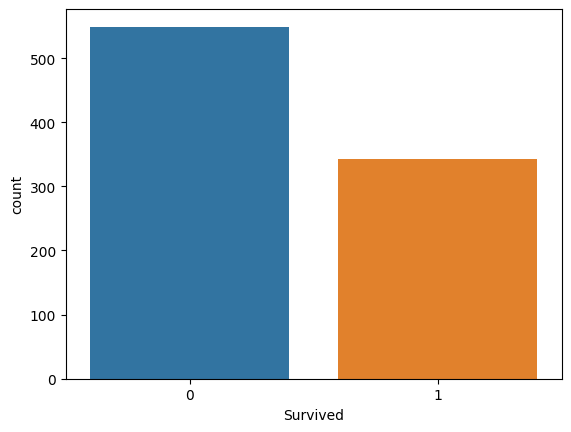

In [10]:
#survival countplot.
sns.countplot(train_df['Survived'] , label='count')
plt.show()

<Axes: ylabel='Survived'>

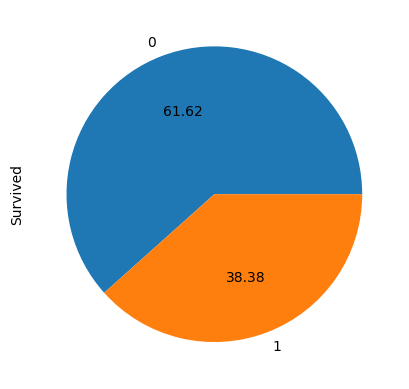

In [11]:
#pie chart for survived column.
train_df['Survived'].value_counts().plot.pie(autopct='%.2f')

#only 38.38% survived in titanic.

In [12]:
#sns.countplot(train_df['Sex'] , hue=train_df['Survived'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-p

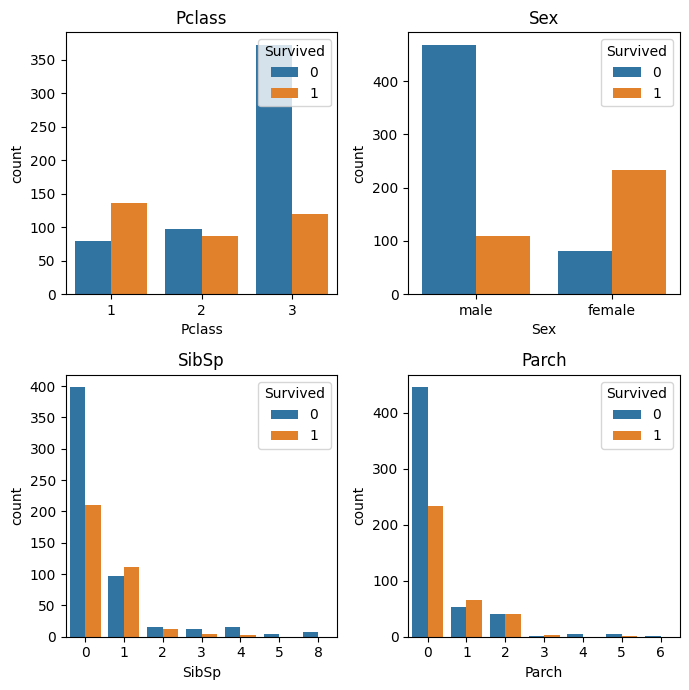

In [13]:
#visulaing the cols sex, parch ,sibsp, embarked, pclass.

col = ['Pclass' , 'Sex' , 'SibSp' , 'Parch']
k=0

fig , ax= plt.subplots(nrows=2,ncols=2 , figsize=(7,7))

for i in range(2):
    for j in range(2):
        sns.countplot(train_df[col[k]] , hue=train_df['Survived'],ax=ax[i][j])
        ax[i][j].set_title(col[k])
        ax[i][j].legend(title='Survived' ,loc='upper right')
        k+=1

plt.tight_layout()
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Embarked', ylabel='count'>

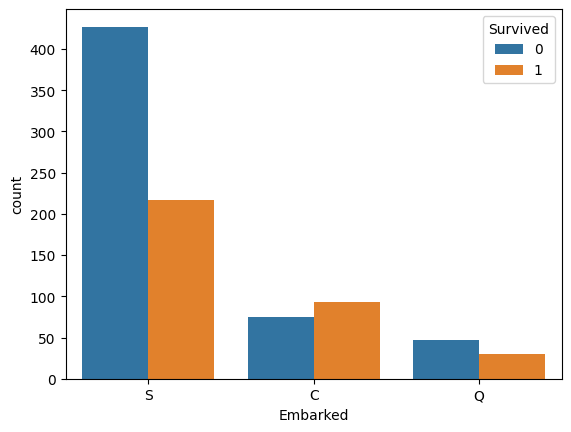

In [14]:
sns.countplot(train_df['Embarked'] , hue=train_df['Survived'])

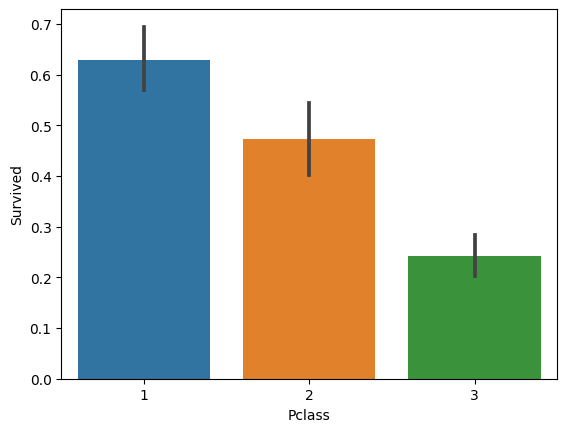

In [15]:
sns.barplot(x='Pclass' , y='Survived' , data=train_df)
plt.show()

In [16]:
train_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
train_df.pivot_table(values='Survived' ,index='Sex' , columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


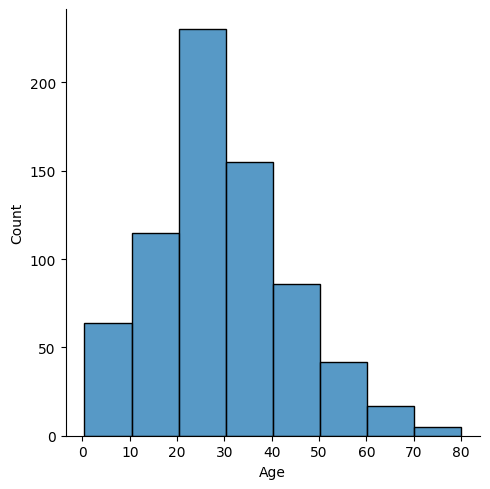

In [18]:
sns.displot(train_df['Age'] , bins=8)
plt.show()

In [19]:
age=pd.cut(train_df['Age'] ,[0 , 18 , 80])
train_df.pivot_table('Survived' , ['Sex',age] , 'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

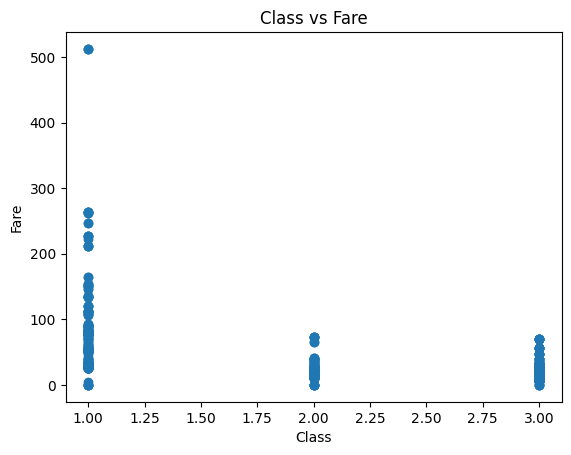

In [20]:
plt.scatter(train_df['Pclass'] , train_df['Fare'])
plt.xlabel("Class")
plt.ylabel('Fare')
plt.title('Class vs Fare')                                     
plt.show()

### Data imputation

In [8]:
train_df.Embarked.fillna(train_df.Embarked.mode()[0] , inplace=True)

In [9]:
label_encode=LabelEncoder()

train_df.iloc[: , 4]=label_encode.fit_transform(train_df.iloc[:, 4].values)
train_df.iloc[: , 11]=label_encode.fit_transform(train_df.iloc[: , 11].values)

print(train_df['Sex'].unique())
print(train_df['Embarked'].unique())

[1 0]
[2 0 1]


In [10]:
known_ages=train_df[train_df['Age'].notnull()]
print(known_ages.shape)

(714, 12)


In [11]:
# known_ages=train_df[train_df['Age'].notnull()]
# unknown_ages=train_df[train_df['Age'].isnull()]

# features=['Pclass' , 'Sex' , 'Parch' , 'SibSp']

# regression_model=LinearRegression()

# regression_model.fit(known_ages[features] , known_ages['Age'])

# predicted_ages=regression_model.predict(unknown_ages[features])


train_df.loc[train_df['Age'].isnull() , 'Age']=train_df['Age'].median()

In [12]:
# predict_known_ages=regression_model.predict(known_ages[features])
# print(mean_squared_error(predict_known_ages , known_ages['Age']))

In [13]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [15]:
train_df=train_df.drop(['Name' , 'Ticket' ,'Cabin'] , axis=1)
train_df=train_df.drop(['PassengerId'] , axis=1)
#train_df=train_df.drop(['Salutation'] , axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### feature scaling 

In [16]:
X=train_df.drop(['Survived'] , axis=1)
Y=train_df['Survived']

print(X.shape , Y.shape)

(891, 7) (891,)


In [17]:
X_train , X_test , Y_train , Y_test=train_test_split(X, Y , test_size=0.2  , random_state=42)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(712, 7) (179, 7) (712,) (179,)


In [18]:
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test)

In [17]:
ef_clf=RandomForestClassifier()
param_grid={
    'n_estimators':[100, 200 , 300],
    'criterion':['gini', 'entropy'],
    'max_depth':[None, 5 ,10],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4],
    'max_features':['auto','sqrt','log2'],
    'random_state':[42]}
clf=GridSearchCV(ef_clf ,param_grid ,cv=5,return_train_score=False)

clf.fit(X_train, Y_train)
clf.cv_results_

{'mean_fit_time': array([0.1149231 , 0.23329449, 0.35404482, 0.12347851, 0.22956986,
        0.35440845, 0.11563997, 0.23702192, 0.35918288, 0.12683821,
        0.21411223, 0.34976478, 0.13988585, 0.2260509 , 0.33625579,
        0.11188087, 0.224121  , 0.33292975, 0.11083827, 0.22270203,
        0.33709688, 0.11378255, 0.21539502, 0.32367811, 0.11354856,
        0.23518567, 0.33642311, 0.12268515, 0.24624124, 0.37602973,
        0.12303424, 0.2442596 , 0.33588495, 0.10742955, 0.21471715,
        0.3185636 , 0.10639338, 0.25179234, 0.36093645, 0.12188597,
        0.2396225 , 0.56271844, 0.11897488, 0.2147737 , 0.31263485,
        0.10352278, 0.2072505 , 0.32062235, 0.10372648, 0.2061708 ,
        0.30835972, 0.10255451, 0.21117992, 0.30613904, 0.11181011,
        0.22667832, 0.33587494, 0.11548109, 0.21694078, 0.32894197,
        0.10533013, 0.21012521, 0.31535058, 0.10715322, 0.21324563,
        0.33271437, 0.11435208, 0.21193962, 0.32115469, 0.10422263,
        0.20792761, 0.31254001,

In [18]:
df=pd.DataFrame(clf.cv_results_)
print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 42}
0.8356249384418397
RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=300,
                       random_state=42)


In [21]:
def models(X_train ,Y_train):
    logistic_regression=LogisticRegression()
    logistic_regression.fit(X_train, Y_train)
    
    decision_tree=DecisionTreeClassifier()
    decision_tree.fit(X_train, Y_train)
    
    random_forest = RandomForestClassifier(criterion='gini', max_depth=5, max_features='auto',
                                           min_samples_leaf=2, min_samples_split=2,
                                           n_estimators=300, random_state=42)
    random_forest.fit(X_train , Y_train)
    
#     clf.fit(X_train, Y_train)
    print('Logistic Regression Training Accuracy:', logistic_regression.score(X_train, Y_train))
    print('Decision Tree Training Accuracy:', decision_tree.score(X_train, Y_train))
    print('Random Forest Training Accuracy:', random_forest.score(X_train, Y_train))
#     print('Random Forest Training Accuracy:', clf.score(X_train, Y_train))
    return logistic_regression ,decision_tree, random_forest

In [22]:
model=models(X_train ,Y_train)

Logistic Regression Training Accuracy: 0.800561797752809
Decision Tree Training Accuracy: 0.9789325842696629
Random Forest Training Accuracy: 0.8525280898876404


In [23]:
print('Logistic Regression Test Accuracy:', accuracy_score(Y_test, model[0].predict(X_test)))
print('Decision Tree Test Accuracy:', accuracy_score(Y_test, model[1].predict(X_test)))
print('Random Forest Test Accuracy:', accuracy_score(Y_test, model[2].predict(X_test)))
# print('Random Forest Test Accuracy:', accuracy_score(Y_test, model[3].predict(X_test)))

Logistic Regression Test Accuracy: 0.8044692737430168
Decision Tree Test Accuracy: 0.7932960893854749
Random Forest Test Accuracy: 0.8212290502793296


In [24]:
#calculating the accuracy for the test set.
for i in range(len(model)):
    cm=confusion_matrix(Y_test , model[i].predict(X_test))
    print(cm)
    print(f'Accuracy score for model[{i}]{(cm[0, 0]+cm[1, 1])/(cm[0, 0]+cm[0 ,1]+cm[1,0]+cm[1,1])}')

[[90 15]
 [20 54]]
Accuracy score for model[0]0.8044692737430168
[[86 19]
 [18 56]]
Accuracy score for model[1]0.7932960893854749
[[96  9]
 [23 51]]
Accuracy score for model[2]0.8212290502793296


In [26]:
Y_test_predict=model[2].predict(X_test)
print(Y_test_predict)
print(Y_test)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64


### Data imputation on test set

In [27]:
test_df=pd.read_csv('test.csv')
test_df.head()
test_df.shape

(418, 11)

In [28]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [29]:
test_df[test_df['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [30]:
test_df.Fare.fillna(test_df['Fare'].median() , inplace=True)

In [31]:
test_df.loc[test_df['Age'].isnull() , 'Age']=test_df['Age'].median()


In [32]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [33]:
label_encoder=LabelEncoder()

test_df.iloc[: , 3]=label_encoder.fit_transform(test_df.iloc[:, 3].values)
test_df.iloc[: , 10]=label_encoder.fit_transform(test_df.iloc[: , 10].values)

print(test_df['Sex'].unique())
print(test_df['Embarked'].unique())
test_df.head()

[1 0]
[1 2 0]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [34]:
test_df=test_df.drop(['PassengerId' ,'Name' , 'Ticket' , 'Cabin'], axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [35]:
test_df=std_scaler.transform(test_df)

In [36]:
test_df_predict=model[0].predict(test_df)

In [37]:
print(test_df_predict)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [39]:
Y_test_predict2=model[2].predict(X_test)
print(Y_test_predict)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [42]:
test=pd.read_csv('test.csv')
submission=pd.DataFrame({'PassengerId':test['PassengerId'] , 'Survived':test_df_predict})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [43]:
filename='Titanic Submission 1.csv'

submission.to_csv(filename , index=False)

print('Saved file: ' , filename)

Saved file:  Titanic Submission 1.csv
